In [27]:
import pandas as pd
import numpy as np
from py_files.data_manager import get_train_data, get_test_data, get_X_y
from py_files.helper_funcs import set_np_pd_display_params
from config import data_path
from shapely.wkt import loads
import xgboost as xgb
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from shapely.geometry import Point, Polygon
from matplotlib.colors import LogNorm
from matplotlib.cm import ScalarMappable
import matplotlib.animation as animation
from IPython.display import HTML

from sklearn.model_selection import train_test_split

set_np_pd_display_params(np, pd)

# load NYC roads as geopandas

In [ ]:
import geopandas as gpd
from shapely.wkt import loads

# Path to your CSV file
csv_file = "your_csv_file.csv"

# Read the CSV file into a Pandas DataFrame
import pandas as pd
df = pd.read_csv(csv_file)



# Now you have a GeoDataFrame with the MULTILINESTRING geometries in the "the_geom" column
print(gdf)


In [ ]:
X, y = get_X_y()

In [49]:
nyc_df = pd.read_csv(f"{data_path}/Centerline.csv")
nyc_df = nyc_df.loc[:, ['the_geom']]

# Convert the "the_geom" column to Shapely geometries
nyc_df['the_geom_geopandas'] = nyc_df['the_geom'].apply(loads)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(nyc_df, geometry='the_geom_geopandas')

min_lon, min_lat, max_lon, max_lat = gdf['the_geom_geopandas'].total_bounds

/tmp/ipykernel_189296/1071620226.py:1: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc_df = pd.read_csv(f"{data_path}/Centerline.csv")


In [54]:
X_small = X.loc[(X['pickup_longitude'] >= min_lon) & (X['pickup_longitude'] <= max_lon) &
            (X['pickup_latitude'] >= min_lat) & (X['pickup_latitude'] <= max_lat), :].copy()
X_small = X_small.loc[(X_small['dropoff_longitude'] >= min_lon) & (X_small['dropoff_longitude'] <= max_lon) &
            (X_small['dropoff_latitude'] >= min_lat) & (X_small['dropoff_latitude'] <= max_lat), :].copy()

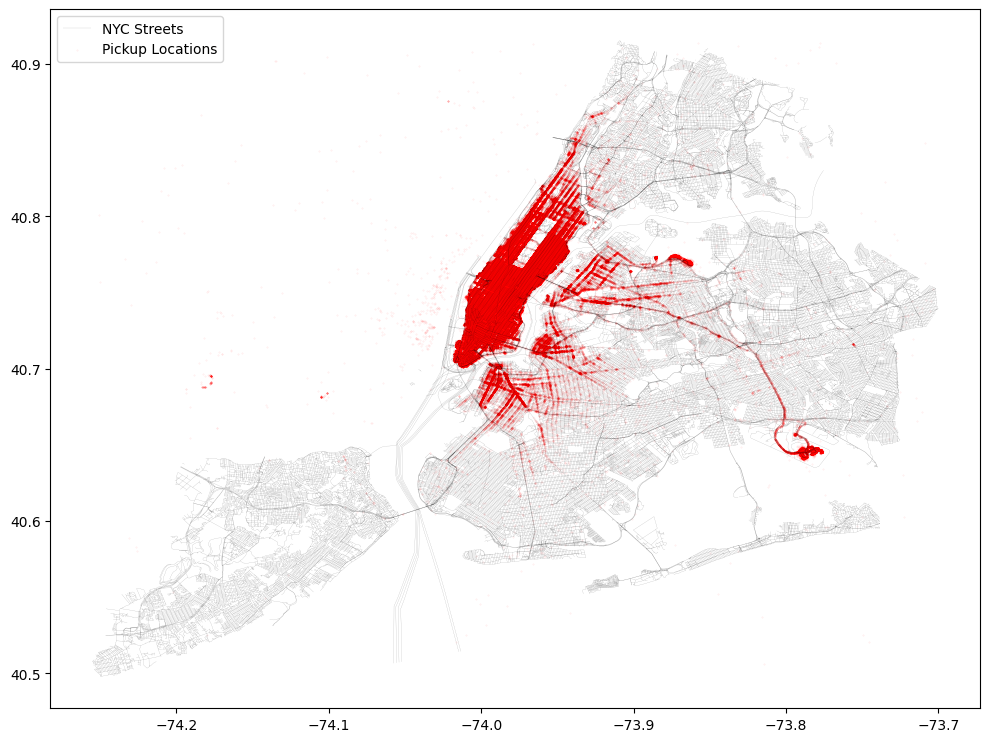

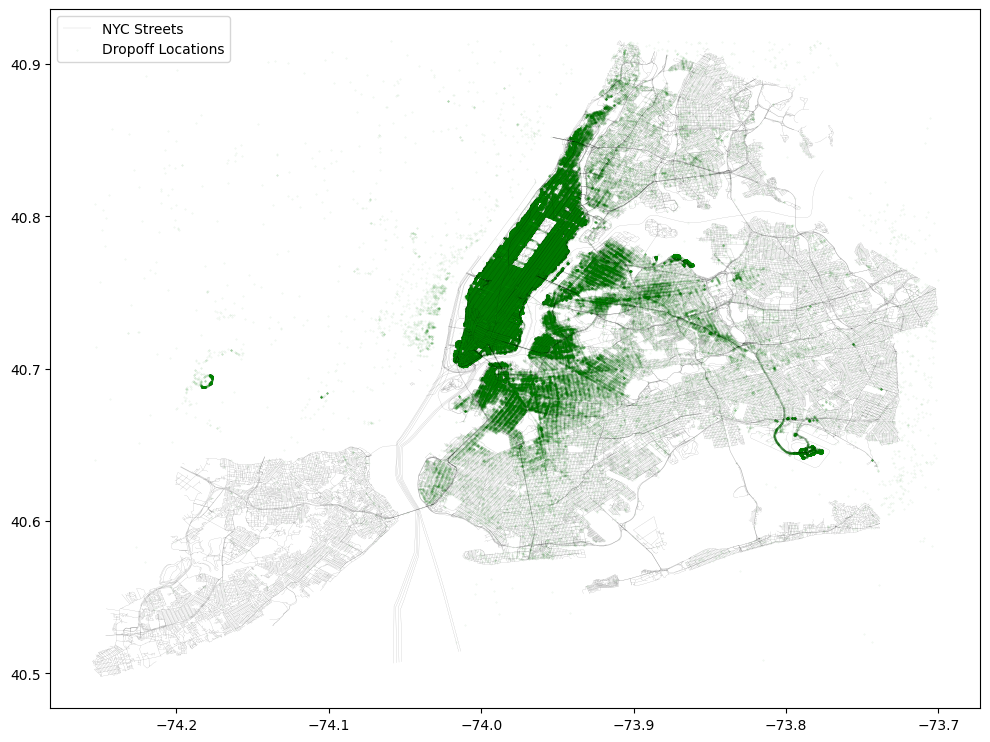

In [62]:
# plot the GeoDataFrame
gdf.plot(linewidth=0.1, edgecolor='black', figsize=(12, 12), alpha=0.5, label="NYC Streets")

plt.scatter(X_small['pickup_longitude'], X_small['pickup_latitude'], c='red', alpha=0.1, s=0.1, label="Pickup Locations")
plt.legend(loc='upper left')
plt.show()


# plot the GeoDataFrame
gdf.plot(linewidth=0.1, edgecolor='black', figsize=(12, 12), alpha=0.5, label="NYC Streets")

plt.scatter(X_small['dropoff_longitude'], X_small['dropoff_latitude'], c='green', alpha=0.1, s=0.1, label="Dropoff Locations")
plt.legend(loc='upper left')
plt.show()

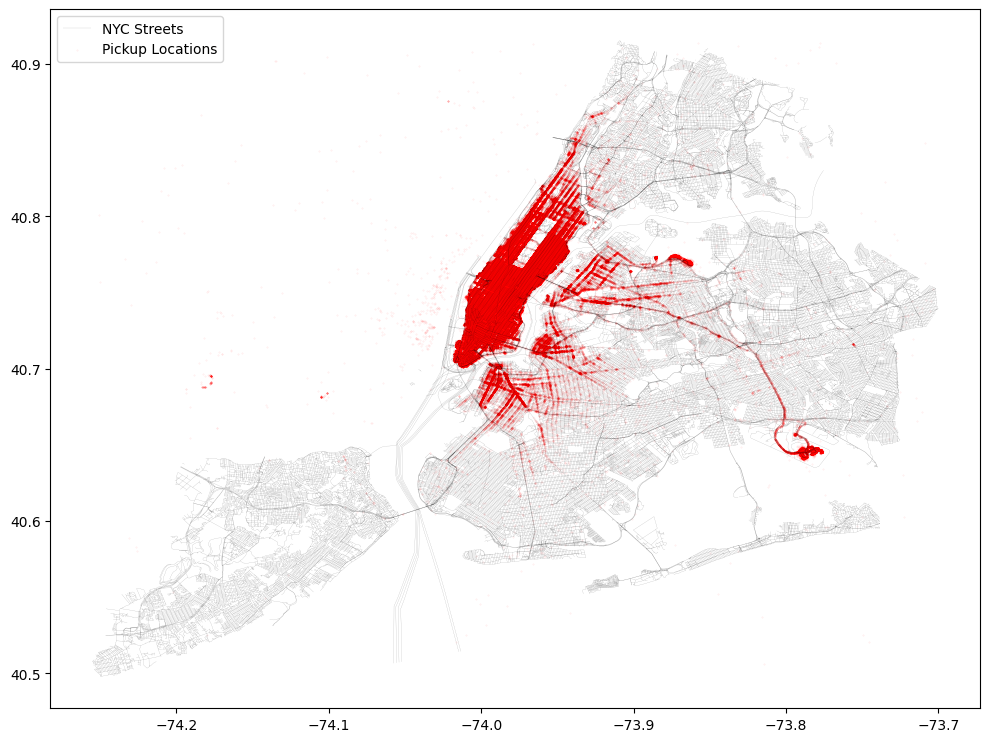

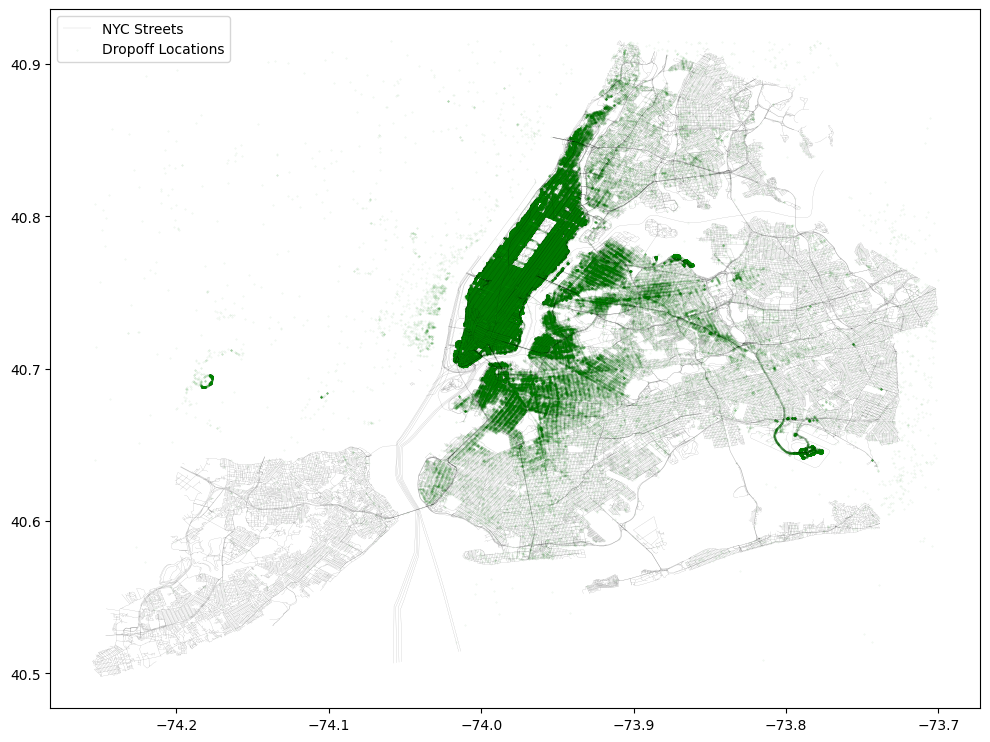

In [63]:
test = get_test_data()

X_small = test
X_small = X.loc[(X['pickup_longitude'] >= min_lon) & (X['pickup_longitude'] <= max_lon) &
            (X['pickup_latitude'] >= min_lat) & (X['pickup_latitude'] <= max_lat), :].copy()
X_small = X_small.loc[(X_small['dropoff_longitude'] >= min_lon) & (X_small['dropoff_longitude'] <= max_lon) &
            (X_small['dropoff_latitude'] >= min_lat) & (X_small['dropoff_latitude'] <= max_lat), :].copy()

# plot the GeoDataFrame
gdf.plot(linewidth=0.1, edgecolor='black', figsize=(12, 12), alpha=0.5, label="NYC Streets")

plt.scatter(X_small['pickup_longitude'], X_small['pickup_latitude'], c='red', alpha=0.1, s=0.1, label="Pickup Locations")
plt.legend(loc='upper left')
plt.show()


# plot the GeoDataFrame
gdf.plot(linewidth=0.1, edgecolor='black', figsize=(12, 12), alpha=0.5, label="NYC Streets")

plt.scatter(X_small['dropoff_longitude'], X_small['dropoff_latitude'], c='green', alpha=0.1, s=0.1, label="Dropoff Locations")
plt.legend(loc='upper left')
plt.show()


In [47]:
# print the minimum and maximum of the longitude and latitude of the gdp['the_geom_geopandas']
print(gdf['the_geom_geopandas'].total_bounds)

min_lon, min_lat, max_lon, max_lat = gdf['the_geom_geopandas'].total_bounds

[-74.2549565 40.4978780 -73.7000202 40.9151032]


In [43]:
print(min_lat, min_lon, max_lat, max_lon)

-74.25495645300373 40.49787800728235 -73.70002020503291 40.91510319260631


In [44]:
print(X['pickup_longitude'].describe())
print(X['pickup_latitude'].describe())

count   1458644.0000000
mean        -73.9734863
std           0.0709019
min        -121.9333420
25%         -73.9918671
50%         -73.9817429
75%         -73.9673309
max         -61.3355293
Name: pickup_longitude, dtype: float64
count   1458644.0000000
mean         40.7509209
std           0.0328812
min          34.3596954
25%          40.7373466
50%          40.7541008
75%          40.7683601
max          51.8810844
Name: pickup_latitude, dtype: float64


In [46]:
display(X)


,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,pickup_hour,pickup_minute,pickup_period,pickup_hour_sin,pickup_hour_cos
0,1,0.4050858,1,-73.9821548,40.7679367,-73.9646301,40.7656021,3,True,False,False,False,False,False,17,24,afternoon,-0.9659258,-0.2588190
1,0,0.8957718,1,-73.9804153,40.7385635,-73.9994812,40.7311516,6,False,False,True,False,False,False,0,43,night,0.0000000,1.0000000
2,1,0.1015537,1,-73.9790268,40.7639389,-74.0053329,40.7100868,1,False,False,False,False,True,False,11,35,morning,0.2588190,-0.9659258
3,1,0.5319466,1,-74.0100403,40.7199707,-74.0122681,40.7067184,4,False,False,False,False,False,True,19,32,evening,-0.9659258,0.2588190
4,1,0.4701272,1,-73.9730530,40.7932091,-73.9729233,40.7825203,3,False,True,False,False,False,False,13,30,afternoon,-0.2588190,-0.9659258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,1,0.5415565,4,-73.9822006,40.7455215,-73.9949112,40.7401695,4,False,False,False,False,False,False,13,31,afternoon,-0.2588190,-0.9659258
1458640,0,0.0511867,1,-74.0009460,40.7473793,-73.9701843,40.7965469,1,False,False,True,False,False,False,7,35,morning,0.9659258,-0.2588190
1458641,1,0.6169787,1,-73.9591293,40.7687988,-74.0044327,40.7073708,4,False,False,False,False,False,False,6,57,night,1.0000000,0.0000000
1458642,0,0.0256264,1,-73.9820786,40.7490616,-73.9746323,40.7571068,1,False,False,False,False,True,False,15,56,afternoon,-0.7071068,-0.7071068


In [48]:
print(X.shape)
X_small = X.loc[(X['pickup_longitude'] >= min_lon) & (X['pickup_longitude'] <= max_lon) &
            (X['pickup_latitude'] >= min_lat) & (X['pickup_latitude'] <= max_lat), :].copy()
print(X_small.shape)


(1458644, 19)
(1458336, 19)


In [38]:
print(X['pickup_longitude'].min(), X['pickup_longitude'].max())

-121.93334197998048 -61.33552932739258


### end load NYC roads as geopandas

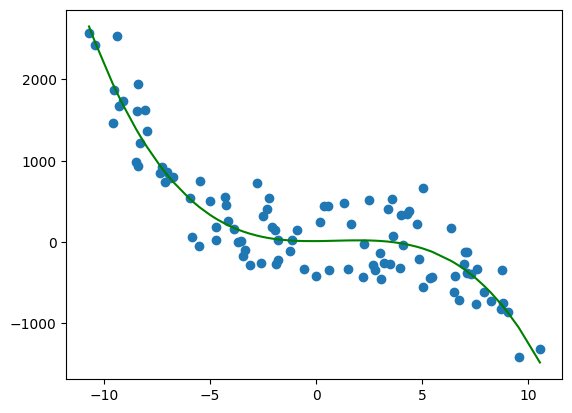

[[1.0000000 -9.2811464 86.1396792 -799.4749766]
 [1.0000000 -9.4069416 88.4905500 -832.4254347]
 [1.0000000 -9.5445527 91.0984859 -869.4942976]
 [1.0000000 -8.5041057 72.3198145 -615.0153499]
 [1.0000000 -7.3790741 54.4507345 -401.7960042]
 [1.0000000 -10.4434786 109.0662447 -1139.0309898]
 [1.0000000 -8.4228719 70.9447703 -597.5587089]
 [1.0000000 -9.6052372 92.2605824 -886.1847815]
 [1.0000000 -8.4207476 70.9089902 -597.1067093]
 [1.0000000 -6.7582034 45.6733130 -308.6695382]
 [1.0000000 -8.2996925 68.8848961 -571.7234580]
 [1.0000000 -8.0784286 65.2610090 -527.2064028]
 [1.0000000 -7.2727820 52.8933584 -384.6818663]
 [1.0000000 -10.7141129 114.7922154 -1229.8967567]
 [1.0000000 -8.4546463 71.4810434 -604.3469362]
 [1.0000000 -9.1091402 82.9764346 -755.8439729]
 [1.0000000 -7.9980432 63.9686943 -511.6243780]
 [1.0000000 -5.5068124 30.3249826 -166.9939900]
 [1.0000000 -7.0171122 49.2398630 -345.5216407]
 [1.0000000 -5.9521310 35.4278635 -210.8712847]
 [1.0000000 -7.1408459 50.9916795 

In [23]:
def f(x): return -1.7*x**3 + 4.2*x**2 + 3.1*x + 2.3

n = 100
xs = np.linspace(-10, 10, n)
xs_noise = np.linspace(-10, 10, n) + np.random.normal(0, 1, n)
ys = f(xs)
ys_noise = f(xs_noise)
ys_noise += np.random.normal(0, 300, n)

plt.scatter(xs_noise, ys_noise)
#plt.plot(xs, ys, color='red')

X = np.hstack([xs_noise.reshape((-1,1))**j for j in range(0, 4)])

b_hat = np.linalg.inv(X.T @ X) @ X.T @ ys_noise
def approx_f(x, b_hat): return b_hat[0] + b_hat[1]*x + b_hat[2]*x**2 + b_hat[3]*x**3

sortation = np.argsort(xs_noise)
xs_noise = xs_noise[sortation]
ys_noise = ys_noise[sortation]
approx_y = approx_f(xs_noise, b_hat)



plt.plot(xs_noise, approx_f(xs_noise, b_hat), color='green')
plt.show()

print(X)

In [2]:
centerline_df = pd.read_csv(f"{data_path}/Centerline.csv")
display(centerline_df)

/tmp/ipykernel_184307/132701926.py:1: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  centerline_df = pd.read_csv(f"{data_path}/Centerline.csv")


,the_geom,PHYSICALID,L_LOW_HN,L_HIGH_HN,R_LOW_HN,R_HIGH_HN,L_ZIP,R_ZIP,L_BLKFC_ID,R_BLKFC_ID,ST_LABEL,STATUS,BIKE_LANE,BOROCODE,ST_WIDTH,CREATED,MODIFIED,TRAFDIR,RW_TYPE,FRM_LVL_CO,TO_LVL_CO,SNOW_PRI,PRE_MODIFI,PRE_DIRECT,PRE_TYPE,POST_TYPE,POST_DIREC,POST_MODIF,FULL_STREE,ST_NAME,BIKE_TRAFD,SEGMENT_TY,SHAPE_Leng
0,MULTILINESTRING ((-73.90600778422906 40.807398...,-1,NaN,NaN,NaN,NaN,10454.0000000,10454.0000000,1422600180,1422600156,BRUCKNER BLVD,2,NaN,2,36,11/29/2007 12:00:00 AM,10/16/2023 12:00:00 AM,FT,1,13,13,C,NaN,NaN,NaN,BLVD,NaN,NaN,BRUCKNER BLVD,BRUCKNER,NaN,R,522.1608911
1,MULTILINESTRING ((-74.01793061274537 40.706174...,3,50,64,51,63,10280.0000000,10280.0000000,212262587,1222601917,BATTERY PL,2,NaN,1,42,11/29/2007 12:00:00 AM,03/17/2017 12:00:00 AM,TW,1,13,13,C,NaN,NaN,NaN,PL,NaN,NaN,BATTERY PL,BATTERY,NaN,U,262.7778123
2,MULTILINESTRING ((-74.01757437049282 40.706839...,5,66,82,65,81,10280.0000000,10280.0000000,1222600642,1222604562,BATTERY PL,2,NaN,1,42,11/29/2007 12:00:00 AM,03/17/2017 12:00:00 AM,TW,1,13,13,C,NaN,NaN,NaN,PL,NaN,NaN,BATTERY PL,BATTERY,NaN,U,259.4159885
3,MULTILINESTRING ((-74.01712051881411 40.707462...,6,84,98,83,101,10280.0000000,10280.0000000,1222600640,1222600933,BATTERY PL,2,NaN,1,42,11/29/2007 12:00:00 AM,03/17/2017 12:00:00 AM,TW,1,13,13,C,NaN,NaN,NaN,PL,NaN,NaN,BATTERY PL,BATTERY,NaN,U,280.4447809
4,MULTILINESTRING ((-74.01693786186667 40.704813...,8,NaN,NaN,NaN,NaN,10280.0000000,10280.0000000,212262587,1222600931,BATTERY PL,2,NaN,1,42,11/29/2007 12:00:00 AM,07/18/2017 12:00:00 AM,TW,1,13,13,C,NaN,NaN,NaN,PL,NaN,NaN,BATTERY PL,BATTERY,NaN,U,32.0701392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121469,MULTILINESTRING ((-73.8123928725374 40.7959213...,201394,6-000,6-068,6-001,6-069,11357.0000000,11357.0000000,0,0,GRACE LN,2,NaN,4,0,09/13/2023 12:00:00 AM,10/19/2023 12:00:00 AM,TW,1,13,13,NaN,NaN,NaN,NaN,LN,NaN,NaN,GRACE LN,GRACE,NaN,U,507.9396512
121470,MULTILINESTRING ((-73.8662900301626 40.6831150...,201397,0,0,318,364,NaN,11208.0000000,2022601280,2022610721,ELDERT LN,2,NaN,3,30,11/29/2007 12:00:00 AM,10/19/2023 12:00:00 AM,TW,1,13,13,C,NaN,NaN,NaN,LN,NaN,NaN,ELDERT LN,ELDERT,NaN,U,441.9218735
121471,MULTILINESTRING ((-74.21472268727592 40.526758...,201401,33,37,0,0,10309.0000000,10309.0000000,1722612336,1722606274,MARETZEK CT,2,NaN,5,18,11/29/2007 12:00:00 AM,10/20/2023 12:00:00 AM,TW,1,13,13,V,NaN,NaN,NaN,CT,NaN,NaN,MARETZEK CT,MARETZEK,NaN,U,78.1711453
121472,MULTILINESTRING ((-74.21576474079232 40.526458...,201402,2,24,1,23,10309.0000000,10309.0000000,1722606274,1722612336,MARETZEK CT,2,NaN,5,18,11/29/2007 12:00:00 AM,10/20/2023 12:00:00 AM,TW,1,13,13,H,NaN,NaN,NaN,CT,NaN,NaN,MARETZEK CT,MARETZEK,NaN,U,309.6166323


# testing data loading

In [3]:
train = get_train_data()
test = get_test_data()
X, y = get_X_y()

display(train)
display(test)
display(X)
display(y)

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,2016-03-14 17:24:55,1,-73.9821548,40.7679367,-73.9646301,40.7656021,455
1,1,2016-06-12 00:43:35,1,-73.9804153,40.7385635,-73.9994812,40.7311516,663
2,2,2016-01-19 11:35:24,1,-73.9790268,40.7639389,-74.0053329,40.7100868,2124
3,2,2016-04-06 19:32:31,1,-74.0100403,40.7199707,-74.0122681,40.7067184,429
4,2,2016-03-26 13:30:55,1,-73.9730530,40.7932091,-73.9729233,40.7825203,435
...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,4,-73.9822006,40.7455215,-73.9949112,40.7401695,778
1458640,1,2016-01-10 07:35:15,1,-74.0009460,40.7473793,-73.9701843,40.7965469,655
1458641,2,2016-04-22 06:57:41,1,-73.9591293,40.7687988,-74.0044327,40.7073708,764
1458642,1,2016-01-05 15:56:26,1,-73.9820786,40.7490616,-73.9746323,40.7571068,373


,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,1,2016-06-30 23:59:58,1,-73.9881287,40.7320290,-73.9901733,40.7566795
1,1,2016-06-30 23:59:53,1,-73.9642029,40.6799927,-73.9598083,40.6554031
2,1,2016-06-30 23:59:47,1,-73.9974365,40.7375832,-73.9861603,40.7295227
3,2,2016-06-30 23:59:41,1,-73.9560699,40.7719002,-73.9864273,40.7304688
4,1,2016-06-30 23:59:33,1,-73.9702148,40.7614746,-73.9615097,40.7558899
...,...,...,...,...,...,...,...
625129,1,2016-01-01 00:02:52,1,-74.0034637,40.7251053,-74.0012512,40.7336426
625130,1,2016-01-01 00:01:52,1,-74.0063629,40.7437820,-73.9534073,40.7824669
625131,1,2016-01-01 00:01:24,2,-73.9722672,40.7598648,-73.8766022,40.7486649
625132,1,2016-01-01 00:00:28,1,-73.9765015,40.7335625,-73.8542633,40.8917885


,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2,2016-03-14 17:24:55,1,-73.9821548,40.7679367,-73.9646301,40.7656021
1,1,2016-06-12 00:43:35,1,-73.9804153,40.7385635,-73.9994812,40.7311516
2,2,2016-01-19 11:35:24,1,-73.9790268,40.7639389,-74.0053329,40.7100868
3,2,2016-04-06 19:32:31,1,-74.0100403,40.7199707,-74.0122681,40.7067184
4,2,2016-03-26 13:30:55,1,-73.9730530,40.7932091,-73.9729233,40.7825203
...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,4,-73.9822006,40.7455215,-73.9949112,40.7401695
1458640,1,2016-01-10 07:35:15,1,-74.0009460,40.7473793,-73.9701843,40.7965469
1458641,2,2016-04-22 06:57:41,1,-73.9591293,40.7687988,-74.0044327,40.7073708
1458642,1,2016-01-05 15:56:26,1,-73.9820786,40.7490616,-73.9746323,40.7571068


0           455
1           663
2          2124
3           429
4           435
           ... 
1458639     778
1458640     655
1458641     764
1458642     373
1458643     198
Name: trip_duration, Length: 1458644, dtype: int64

In [4]:
print(X['vendor_id'].unique())

[2 1]


# figuring out data cleaning

In [4]:
import pandas as pd
from config import data_path

train = pd.read_csv(f'{data_path}/train.csv')
test = pd.read_csv(f'{data_path}/test.csv')

cols_to_drop = ['id', 'store_and_fwd_flag', 'dropoff_datetime']

train_cols_to_drop = [c for c in train.columns if c in cols_to_drop]
train_cleaned = train.drop(columns=train_cols_to_drop)

test_cols_to_drop = [c for c in test.columns if c in cols_to_drop]
test_cleaned = test.drop(columns=test_cols_to_drop)


display(train_cleaned)
display(test_cleaned)

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,455
1,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,663
2,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,429
4,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,435
...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,778
1458640,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,655
1458641,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,764
1458642,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,373


,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680
1,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403
2,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523
3,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469
4,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890
...,...,...,...,...,...,...,...
625129,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643
625130,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467
625131,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665
625132,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788


# trying nyc on XGBoost vanilla

In [19]:
data_path = "/home/jeffx/ACME/senior/vol3/_Homework/data/nyc-taxi-trip-duration/train.csv"
nyc_data = pd.read_csv(data_path)
rel_cols = [
    'pickup_datetime', 'dropoff_datetime', 'passenger_count', 
    'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 
    'dropoff_latitude', 'trip_duration']
data = nyc_data[rel_cols].copy()
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime']).astype('int64') // 10**9
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime']).astype('int64') // 10**9
# scale the pickup and dropoff datetimes with min-max scaling
data['pickup_datetime'] = (data['pickup_datetime'] - data['pickup_datetime'].min()) / (data['pickup_datetime'].max() - data['pickup_datetime'].min())
data['dropoff_datetime'] = (data['dropoff_datetime'] - data['dropoff_datetime'].min()) / (data['dropoff_datetime'].max() - data['dropoff_datetime'].min())

X = data.drop('trip_duration', axis=1).copy().values
y = data['trip_duration'].copy().values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_regres = xgb.XGBRegressor()
xgb_regres.fit(X_train, y_train)
y_pred = xgb_regres.predict(X_test)
y_pred = y_pred.astype(int)
y_pred[y_pred < 0] = 0

print(y_pred[y_pred < 0])

print(np.sum(y_pred >= 0), len(y_pred))

from sklearn.metrics import mean_squared_error
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# compute the Root Mean Squared Logarithmic Error
def rmsle(y, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y_pred))))
print("RMSLE: ", rmsle(y_test, y_pred))

[]
291729 291729
RMSE:  2924.022960643033
RMSLE:  0.5802788877334573


# predict type of exercise

<h1>Question 5.18</h1>

Apply a random forest regressor or classifier to your final project dataset.

(i) Optimize the choice of hyperparameters, including <code>n_estimators</code>, <code>max_depth</code> and <code>max_features</code>.

(ii) Compare the performance of the random forest to the performance of other types of models on this dataset.

(iii) If appropriate for this dataset, identify the three most and least important features. If this is not appropriate to do for this dataset, explain why it is not.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_california_housing, load_digits
from sklearn.model_selection import train_test_split
from seaborn import load_dataset as sns_load_dataset
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.decomposition import PCA
import json
import xgboost as xgb

data_path = "/home/jeffx/ACME/WearableHealthPredictor/data"

np.set_printoptions(precision=5, suppress=True)
pd.set_option("display.precision", 15)
np.set_printoptions(formatter={'float': lambda x: "{0:0.7f}".format(x)})
pd.set_option('display.float_format', lambda x: "{0:0.7f}".format(x))
pd.set_option('display.max_columns', None)

def movecol(df, cols_to_move=[], ref_col='', place='After'):
    """Moves columns around in a dtaframe
    Examples:
    1)
        df cols ['A', 'B', 'C', 'D', 'X', 'Y', 'Z']
        movecol(df, cols_to_move=['X', 'Y', 'Z'], ref_col='B', place='After')
        df cols ['A', 'B', 'X', 'Y', 'Z', 'C', 'D']]
        
    2)
        df cols ['A', 'B', 'C', 'D', 'X', 'Y', 'Z']
        movecol(df, cols_to_move=['X', 'Y', 'Z'], ref_col='A', place='Before')
        df cols ['X', 'Y', 'Z', 'A', 'B', 'C', 'D']
    """
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    return(df[seg1 + seg2 + seg3])

In [8]:
# load in the csv and select only the relevant columns
df_exercise = pd.read_csv(f"{data_path}/activity_environment_data.csv")
rel_cols = [
    'Steps', 'Calories_Burned', 'Distance_Covered', 
    'Exercise_Duration', 'Exercise_Intensity', 
    'Ambient_Temperature', 'Altitude', 'UV_Exposure'] + ['Exercise_Type']
df_exercise = df_exercise[rel_cols]

# convert exercise intensity to a numeric value
df_exercise['Exercise_Intensity'] = df_exercise['Exercise_Intensity'].fillna('None')
df_exercise['Exercise_Intensity'] = df_exercise['Exercise_Intensity'].map(
    {'None': 0, 'Low':1, 'Moderate':2, 'High':3}
)
display(df_exercise)

for exercise_type, frame in df_exercise.groupby('Exercise_Type'):
    print(exercise_type)
    display(frame.describe())

,Steps,Calories_Burned,Distance_Covered,Exercise_Duration,Exercise_Intensity,Ambient_Temperature,Altitude,UV_Exposure,Age,Weight,Height,Medication,Smoker,Alcohol_Consumption,Sleep_Duration,Deep_Sleep_Duration,REM_Sleep_Duration,Wakeups,Snoring,Heart_Rate,Blood_Oxygen_Level,ECG,Calories_Intake,Water_Intake,Stress_Level,Skin_Temperature,Body_Fat_Percentage,Muscle_Mass,Health_Score,Exercise_Type_None,Exercise_Type_Running,Exercise_Type_Strength Training,Exercise_Type_Yoga,Gender_Female,Gender_Male,Gender_Other,Medical_Conditions_Diabetes,Medical_Conditions_Hypertension,Medical_Conditions_None,Mood_Anxious,Mood_Happy,Mood_Neutral,Mood_Sad
0,9146,457.3000000,7.3168000,1.2196752,1,27.2715255,1739.6906621,4.0691325,61,88.6776227,178.5242311,0,0,1,6.5182059,2.7850332,3.7331726,4,1,147,90.6585051,0,2444.9858078,3.1055560,2,32.7529927,17.4329853,77.5994483,25.9920710,0,1,0,0,0,0,1,1,0,0,0,0,1,0
1,9362,468.1000000,7.4896000,1.3783987,2,24.4302885,4102.0428236,1.7236723,24,86.7420841,200.3463580,1,0,1,7.5224464,0.8743905,6.6480559,2,1,147,97.1333603,1,2199.7770200,2.4411184,3,35.0100441,23.9577925,71.7189357,64.3084497,0,0,0,1,0,1,0,0,0,1,1,0,0,0
2,21,1.0500000,0.0168000,0.8038566,2,29.3405739,1794.8999355,0.1356468,81,61.6560536,195.9713561,1,0,1,8.5833860,6.7604764,1.8229096,2,0,176,99.5555940,0,2182.7556405,1.2403405,1,36.7975232,22.9955332,59.8749357,78.0035458,0,0,1,0,0,0,1,0,1,0,0,0,0,1
3,13252,662.6000000,10.6016000,0.0000000,0,25.2892301,4025.8409215,4.4083426,70,141.5137936,164.1782164,0,0,2,4.4257670,2.6455959,1.7801711,2,1,157,91.4448998,1,1451.2188884,1.6823830,2,32.6145921,13.4106586,67.5280981,16.4541064,1,0,0,0,0,0,1,0,1,0,0,1,0,0
4,21,1.0500000,0.0168000,0.8073890,3,21.8535900,3422.3814469,2.8207389,30,80.5528723,146.9206749,1,1,2,6.0089185,4.4406717,1.5682468,3,0,86,96.0921028,1,1583.5627734,1.4618618,3,33.6023194,24.9200196,54.7414867,42.5282021,0,0,0,1,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12443,622.1500000,9.9544000,0.0000000,0,34.4287708,4736.9699928,7.1570933,16,143.3017415,152.8226165,0,0,2,8.3280844,0.9170085,7.4110760,0,0,75,92.1295817,0,2482.9329114,1.0350767,3,34.7457207,33.7413221,51.0810337,30.9890371,1,0,0,0,1,0,0,0,1,0,0,0,1,0
9996,4492,224.6000000,3.5936000,0.5922883,3,32.0682396,3763.9105488,6.6371734,46,89.4470035,168.0858938,0,1,0,5.3550883,4.8349214,0.5201669,3,0,62,93.0392477,1,2196.0323783,1.0387019,1,37.6687511,16.1439119,45.3212715,33.4796013,0,0,0,1,0,0,1,0,1,0,1,0,0,0
9997,4081,204.0500000,3.2648000,0.8884620,2,38.7766199,2726.0245117,0.9435912,62,43.2842742,200.5363945,0,0,0,9.0167520,2.6278392,6.3889129,2,1,129,95.9278843,0,1259.9328589,2.0630284,2,36.3538274,24.0031213,69.1090824,63.3615507,0,0,0,1,1,0,0,0,0,1,0,0,0,1
9998,10319,515.9500000,8.2552000,0.9225235,1,34.3193926,2391.1961970,1.5939005,27,86.4364945,162.1254260,0,0,1,4.4651591,0.7885863,3.6765728,0,1,93,100.4003758,0,2156.6865429,1.6190091,2,37.4438237,10.1343273,36.2259620,60.7952665,0,0,1,0,1,0,0,1,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Steps                            10000 non-null  int64  
 1   Calories_Burned                  10000 non-null  float64
 2   Distance_Covered                 10000 non-null  float64
 3   Exercise_Duration                10000 non-null  float64
 4   Exercise_Intensity               10000 non-null  int64  
 5   Ambient_Temperature              10000 non-null  float64
 6   Altitude                         10000 non-null  float64
 7   UV_Exposure                      10000 non-null  float64
 8   Age                              10000 non-null  int64  
 9   Weight                           10000 non-null  float64
 10  Height                           10000 non-null  float64
 11  Medication                       10000 non-null  int64  
 12  Smoker             

None

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your data (replace 'your_data.csv' with the actual path to your data)
data = df_exercise

# Select the features you want to use for clustering
features = data[['Steps', 'Calories_Burned', 'Distance_Covered', 'Exercise_Duration',
                 'Exercise_Intensity', 'Ambient_Temperature', 'Altitude', 'UV_Exposure']].copy().values

# Standardize the data (important for K-Means)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to your data
kmeans.fit(scaled_features)

# Add cluster labels to your DataFrame
data['Cluster'] = kmeans.labels_

# View the results, e.g., the count of data points in each cluster
cluster_counts = data['Cluster'].value_counts()
print(cluster_counts)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)
print(pca_data.shape)

# You can also plot the clusters if you want to visualize the results
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans.labels_, cmap='viridis', alpha=0.1)
plt.show()


In [ ]:
# load in each of the dataframes
data_path = "/home/jeffx/ACME/WearableHealthPredictor/data"
df = pd.read_csv(f"{data_path}/health_data_clean.csv")

# merge the Exercise_Type columns together to get it as a predicted column
all_exercise_type_cols = ["Exercise_Type_None",	"Exercise_Type_Running", "Exercise_Type_Strength Training", "Exercise_Type_Yoga"]
exercise_type_cols = ["Exercise_Type_Running", "Exercise_Type_Strength Training", "Exercise_Type_Yoga"]
for i, col in enumerate(exercise_type_cols):
    df[col] = df[col] * (i + 1)
df["Exercise_Type"] = df[exercise_type_cols].sum(axis=1) - 1
df = df.drop(columns=all_exercise_type_cols)
df = df.loc[df['Exercise_Type'] != -1, :]

# only consider the relevent columns
rel_cols = [
    'Steps', 'Calories_Burned', 'Distance_Covered', 
    'Exercise_Duration', 'Exercise_Intensity', 
    'Ambient_Temperature', 'Altitude', 'UV_Exposure']

df = df[rel_cols + ["Exercise_Type"]]

# split the data into X and y for train and test
X_df = df.drop(columns=["Exercise_Type"])
features = X_df.columns.tolist()
X = X_df.copy().values

y = df["Exercise_Type"].copy().values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
display(df)

for exercise_type, frame in df.groupby("Exercise_Type"):
    print(exercise_type)
    display(frame.describe())

### train optimal RandomForestClassifier

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 3, 5, 10, 20],
    'max_features': [None, 'sqrt', 'log2']
}

# Create a GridSearchCV object and get the optimal parameters and best score
rf = RandomForestClassifier(warm_start=False)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1).fit(X_train, y_train)

# get the best params and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# save the best_params and best_accuracy so I don't have to rerun the GridSearchCV again
import json
with open("best_params.json", "w") as f:
    obj = {
        'best_accuracy': float(round(best_accuracy, 5)), 
        'best_params':best_params
    }
    json.dump(obj, f)

In [ ]:
# load the best params and accuracy
with open("best_params.json") as file:
    obj = json.load(file)
    best_accuracy = obj['best_accuracy']
    best_params = obj['best_params']

# train a new model using the optimal parameters
rf_optimal = RandomForestClassifier(**best_params, warm_start=False)
rf_optimal.fit(X_train, y_train)
rf_predictions = rf_optimal.predict(X_test)
rf_accuracy = rf_optimal.score(X_test, y_test)

# select the top 5 features
feature_importance = rf_optimal.feature_importances_
features_sorted = sorted(list(zip(features, feature_importance)), key=lambda x: x[1], reverse=True)
top_5_features = features_sorted[:5]
top_features, top_feature_scores = map(list, zip(*top_5_features))

# print out the best parameters and the Accuracy
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)
print("RandomForest Accuracy:", rf_accuracy)
print("Top 5 Features:", top_features)
print("Top 5 Feature Scores:", top_feature_scores)

### train an XGBoost Classifier

In [ ]:
# train and predict with a default XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# get the accuracy and feature importance
xgb_accuracy = xgb_model.score(X_test, y_test)
xgb_feature_importance = xgb_model.feature_importances_
xgb_features_sorted = sorted(list(zip(features, xgb_feature_importance)), key=lambda x: x[1], reverse=True)
xgb_top_5_features = xgb_features_sorted[:5]
xgb_top_features, xgb_top_feature_scores = map(list, zip(*xgb_top_5_features))

# print out the accuracy and top 5 features
print("XGB Accuracy:", xgb_accuracy)
print("XGB Top 5 Features:", xgb_top_features)
print("XGB Top 5 Feature Scores:", xgb_top_feature_scores)

### train a decision tree classifier

In [ ]:
# train and predict with a default DecisionTree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# get the accuracy and feature importance
dt_accuracy = dt_model.score(X_test, y_test)
dt_feature_importance = dt_model.feature_importances_
dt_features_sorted = sorted(list(zip(features, dt_feature_importance)), key=lambda x: x[1], reverse=True)
dt_top_5_features = dt_features_sorted[:5]
dt_top_features, dt_top_feature_scores = map(list, zip(*dt_top_5_features))

# print out the accuracy and top 5 features
print("DT Accuracy:", dt_accuracy)
print("DT Top 5 Features:", dt_top_features)
print("DT Top 5 Feature Scores:", dt_top_feature_scores)

### analysis

In [ ]:
# display an accuracy table for the 3 models
accuracy_df = pd.DataFrame({
    'Model': ['RandomForest', 'XGBoost', 'DecisionTree'],
    'Accuracy': [rf_accuracy, xgb_accuracy, dt_accuracy],
    'Optimized': [True, False, False]
})
display(accuracy_df)

In [ ]:
# plot each of the ROC curves
def plot_roc_auc(fpr, tpr, roc_auc, classifier, data_name):
    """takes in the false-positive-rate, the true-positive-rate and the
    area-under-the-curve, the name of the classifier, and the name of the dataset
    and plots the ROC curver with the AUC
    """
    plt.plot(fpr, tpr, color='yellow', lw=5, label=f"{classifier} for {data_name}")
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve, AUC={round(roc_auc, 3)}')
    plt.legend(loc='lower right')

# for each model plot the ROC curve for each class
models = [('RandomForest', rf_optimal), ('XGBoost', xgb_model), ('DecisionTree', dt_model)]
classes = ["Running", "Strength Training", "Yoga"]

for i, (model_name, model) in enumerate(models):
    
    probs = model.predict_proba(X_test)
    print(probs)
    
    # for each class
    for j, probs_col in enumerate(probs.T):
        curr_class = classes[j]
        
        # select only the rows that are the current class
        mask = y_test == j
        y_test_curr_class = np.zeros(len(y_test))
        y_test_curr_class[mask] = 1
        
        # get the ROC curve and the AUC (Area Under the Curve) values
        fpr, tpr, thresholds = roc_curve(y_test_curr_class, probs_col)
        roc_auc = auc(fpr, tpr)
        plt.subplot(3, 4, i*4 + j+1)
        plot_roc_auc(fpr, tpr, roc_auc, model_name, curr_class)
    
# show the final plot
plt.gcf().set_size_inches(20,15)
plt.show()